In [3]:
from Bio.Seq import Seq

In [4]:
dir(Seq)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'back_transcribe',
 'complement',
 'complement_rna',
 'count',
 'count_overlap',
 'encode',
 'endswith',
 'find',
 'index',
 'join',
 'lower',
 'lstrip',
 'reverse_complement',
 'reverse_complement_rna',
 'rfind',
 'rindex',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'tomutable',
 'transcribe',
 'translate',
 'ungap',
 'upper']

In [5]:
# Create a sequence
seql = Seq('ATGATCTCGTAA')

In [6]:
seql

Seq('ATGATCTCGTAA')

In [8]:
protein_a = Seq('MIT')

In [10]:
protein_a

Seq('MIT')

In [12]:
# Length of seq
len(seql)

12

In [13]:
# Slicing
seql[0:3]

Seq('ATG')

In [14]:
# Reverse
seql[::-1]

Seq('AATGCTCTAGTA')

In [15]:
seq2 = Seq('ATGATCTCGTGG')

In [17]:
# Join seq
seql[0:6] + seq2

Seq('ATGATCATGATCTCGTGG')

In [19]:
# Find number of nucleotides
print(seql)
seql.count('G')

ATGATCTCGTAA


2

In [21]:
seql.count('A')

4

In [22]:
# Count number of codon
seql.count('ATG')

1

In [24]:
# Find position of a nucleotide
print(seql)
seql.find('G')

ATGATCTCGTAA


2

In [25]:
# Find position from the right
seql.rfind('G')

8

In [28]:
# Find location using index
seql.index('G')
seql.rindex('G')

8

In [29]:
# Plot of frequency
import matplotlib.pyplot as plt

In [30]:
from collections import Counter

In [31]:
seql

Seq('ATGATCTCGTAA')

In [34]:
dna_freq = Counter(seql)

In [35]:
dna_freq

Counter({'A': 4, 'T': 4, 'G': 2, 'C': 2})

<BarContainer object of 4 artists>

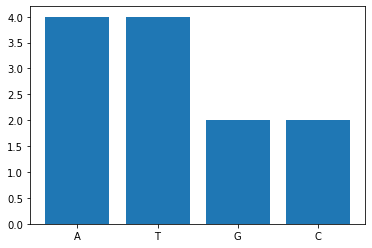

In [36]:
plt.bar(dna_freq.keys(), dna_freq.values())

In [2]:
from Bio.Seq import Seq

In [5]:
dna_seq = Seq('ATGATCTCGTAA')

In [6]:
len(dna_seq)

12

In [7]:
# Complement
dna_seq.complement()

Seq('TACTAGAGCATT')

In [8]:
# Reverse Complement
dna_seq.reverse_complement()

Seq('TTACGAGATCAT')

In [10]:
## Reverse complement with python function
dna_seq.complement()[::-1]

Seq('TTACGAGATCAT')

In [11]:
dna_seq

Seq('ATGATCTCGTAA')

In [12]:
# Transcription
# Convert DNA to mRNA
dna_seq.transcribe()

Seq('AUGAUCUCGUAA')

In [13]:
# Translation
# mRNA to Aminoacids
# * = stop codon
rna = dna_seq.transcribe()
rna.translate()

Seq('MIS*')

In [14]:
# Translation from DNA to Aminoacids
dna_seq.translate()

Seq('MIS*')

In [15]:
# Create custom stop codon symbol
rna.translate(stop_symbol="@")

Seq('MIS@')

In [16]:
# Back transcription
# mRNA to DNA
rna.back_transcribe()

Seq('ATGATCTCGTAA')

In [17]:
rna.back_transcribe() == dna_seq

True

In [18]:
# Convert AA to 3 letters
from Bio.SeqUtils import seq3,seq1

In [20]:
aa = dna_seq.translate()
aa

Seq('MIS*')

In [21]:
seq3(aa)

'MetIleSerTer'

In [23]:
seq1("MetIleSerTer")

'MIS*'

In [25]:
## View codon table
from Bio.Data import CodonTable
dir(CodonTable)

['AmbiguousCodonTable',
 'AmbiguousForwardTable',
 'CodonTable',
 'IUPACData',
 'NCBICodonTable',
 'NCBICodonTableDNA',
 'NCBICodonTableRNA',
 'TranslationError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'ambiguous_dna_by_id',
 'ambiguous_dna_by_name',
 'ambiguous_generic_by_id',
 'ambiguous_generic_by_name',
 'ambiguous_rna_by_id',
 'ambiguous_rna_by_name',
 'generic_by_id',
 'generic_by_name',
 'list_ambiguous_codons',
 'list_possible_proteins',
 'make_back_table',
 'register_ncbi_table',
 'standard_dna_table',
 'standard_rna_table',
 'unambiguous_dna_by_id',
 'unambiguous_dna_by_name',
 'unambiguous_rna_by_id',
 'unambiguous_rna_by_name']

In [27]:
print(CodonTable.unambiguous_dna_by_name['Standard'])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [28]:
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [29]:
from Bio.SeqUtils import GC

In [30]:
dna_seq

Seq('ATGATCTCGTAA')

In [33]:
# Quanto maior a porcentagem de GC, maior o melting point (pois a molécula é mais estável)

GC(dna_seq)

33.333333333333336

In [35]:
## Custom function to get GC
dna_seq.count('G')

2

In [40]:
def gc_content(seq):
    result = float((seq.count('G') + seq.count('C')) / len(seq))
    return result
    
gc_content(dna_seq)
    

0.3333333333333333

In [42]:
def gc_content2(seq):
    gc = [ B for B in seq.upper() if B in 'GC' ]
    result = float(len(gc))/len(seq)
    return result
    
gc_content2(dna_seq)

0.3333333333333333

In [43]:
import Bio.SeqUtils
dir (Bio.SeqUtils)

['GC',
 'GC123',
 'GC_skew',
 'IUPACData',
 'Seq',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'cos',
 'molecular_weight',
 'nt_search',
 'pi',
 're',
 'seq1',
 'seq3',
 'sin',
 'six_frame_translations',
 'xGC_skew']

In [44]:
from Bio.SeqUtils import MeltingTemp as mt

In [45]:
dna_seq

Seq('ATGATCTCGTAA')

In [46]:
GC(dna_seq)

33.333333333333336

In [47]:
# get melting point using wallace (in celcius)
mt.Tm_Wallace(dna_seq)

32.0

In [48]:
# Check melting point using GC content
mt.Tm_GC(dna_seq)

23.32155893208184

In [51]:
# Check GC Skew
##
from Bio.SeqUtils import GC123,GC_skew,xGC_skew

In [52]:
dna_seq

Seq('ATGATCTCGTAA')

In [53]:
GC123(dna_seq)

(33.333333333333336, 0.0, 25.0, 75.0)

In [54]:
GC_skew(dna_seq)

[0.0]

In [55]:
GC_skew(dna_seq, 10)

[0.0, 0.0]

In [60]:
GC_skew('ATGGGGTCCCGCTC')

[0.0]

In [61]:
from Bio.SeqUtils import nt_search

In [65]:
s1 = Seq('ACTATT')
subseq = Seq('CTA')

In [66]:
nt_search(str(s1), str(subseq))

['CTA', 1]